In [86]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import os
import skimage
from skimage.util import montage
import nibabel
import csv
patients = ['sub-AD4009', 'sub-AD4215', 'sub-AD4500', 'sub-AD4892','sub-AD6264']

raw_data_reverted = {}
for patient in patients:
    raw_data_reverted[patient] = pd.read_csv('output/' + patient + '/connect_matrix_reverted.csv')
raw_data_rough = {}
for patient in patients:
    raw_data_rough[patient] = pd.read_csv('output/sub-AD4009/connect_matrix_rough.csv')

In [2]:
data_reverted = {}
data_rough = {}
for patient in patients: 
    data_reverted[patient] = np.array(raw_data_reverted[patient])
    data_rough[patient] = np.array(raw_data_rough[patient])
    #print(patient,  'reverted')
    #plt.imshow(data_reverted[patient])
    #plt.show()
    #print(patient, 'rough')
    #plt.imshow(data_rough[patient])
    #plt.show()

(181, 217, 181)


C:\Users\anith\AppData\Local\Temp/ipykernel_9596/4240506911.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  regions = nibabel.load('aal.nii.gz').get_data()


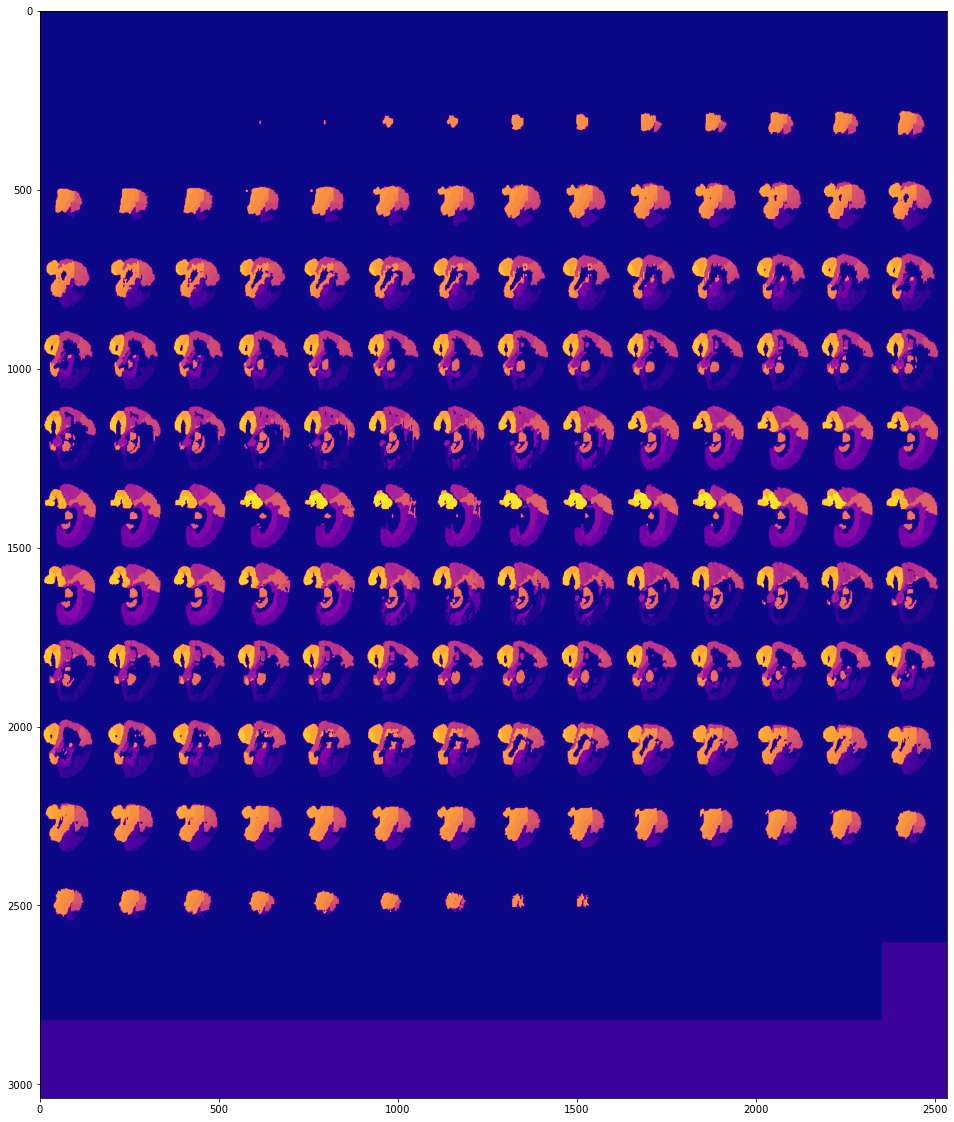

In [31]:
#test image for nii.gz filetype 
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
regions = nibabel.load('aal.nii.gz').get_data()
print(np.array(regions).shape)
ax1.imshow(montage(regions), cmap ='plasma')


C:\Users\anith\AppData\Local\Temp/ipykernel_9596/3115886221.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image = nibabel.load("PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2011-10-24]_opt.nii.gz").get_data()


(181, 217, 181, 4)


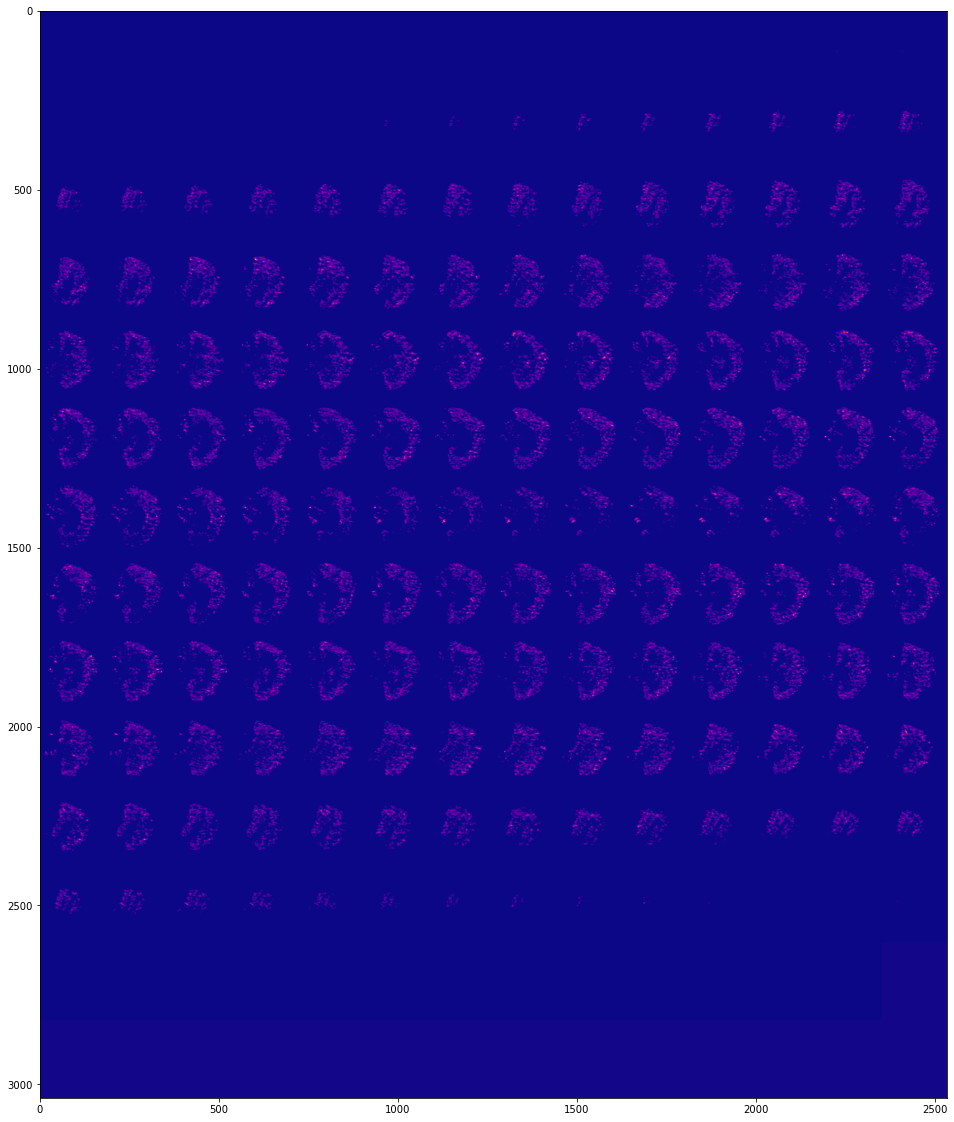

In [72]:
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
test_image = nibabel.load("PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2011-10-24]_opt.nii.gz").get_data()
print(np.array(test_image).shape)
ax1.imshow(montage(test_image[:,:,:,3]),cmap='plasma')


In [87]:
def extractRegionMeans(regionMap, PET):
    PET = PET[:,:,:,3]
    value =   PET[np.where(109 <= regionMap)].mean()
    means = []
    for i in range(1,117):
        means.append(PET[np.where(i == regionMap)].mean())
    maximum_region = max(means)
    minimum_region = min(means)
    normalized = (means- minimum_region)/(maximum_region-minimum_region)
    final = []
    for i in range(len(normalized)):
        final.append(normalized[i],)
    #final.sort(key=lambda tup: tup[0])
    return final



In [88]:
def saveToTextFile(li):
    with open('nodeIntensities', 'w') as f:
        write = csv.writer(f)
        write.

In [89]:
saveToTextFile(extractRegionMeans(regions,test_image))

AttributeError: module 'csv' has no attribute 'write'